In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes

In [6]:
confirmed_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Confirmed_archived_0325.csv'
recovered_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Recovered_archived_0325.csv'
death_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/archived_data/archived_time_series/time_series_19-covid-Deaths_archived_0325.csv'

In [37]:
df_confirmed = pd.read_csv(confirmed_url)
df_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [15]:
df_confirmed.shape

(501, 66)

In [9]:
df_confirmed.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [21]:
confirm_df = df_confirmed.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
confirm_df.head()

,Province/State,Country/Region,Lat,Long,variable,value
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [23]:
confirm_df.rename(columns={'variable':'Date','value':'Confirmed'},inplace=True)
confirm_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0


In [24]:
confirm_df.shape

(31062, 6)

In [25]:
# Function to fetch and reshape
def get_melt(data_url,case_type):
    df = pd.read_csv(data_url)
    melted_df = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'])
    melted_df.rename(columns={'variable':'Date','value':case_type},inplace=True)
    return melted_df

In [27]:
# To fetch death or recovered
recovered_df = get_melt(recovered_url,'Recovered')
death_df = get_melt(death_url,'Deaths')

In [30]:
print(recovered_df.shape)
print(death_df.shape)

(31062, 6)
(31062, 6)


### Merging the three columns together

In [35]:
final_df = confirm_df.join(recovered_df['Recovered']).join(death_df['Deaths'])
final_df.tail()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
31057,NaN,Jersey,49.1900,-2.110,3/23/20,0.0,0.0,0.0
31058,NaN,Puerto Rico,18.2000,-66.500,3/23/20,0.0,0.0,1.0
31059,NaN,Republic of the Congo,-1.4400,15.556,3/23/20,0.0,0.0,0.0
31060,NaN,The Bahamas,24.2500,-76.000,3/23/20,0.0,0.0,0.0
31061,NaN,The Gambia,13.4667,-16.600,3/23/20,0.0,0.0,0.0


In [32]:
final_df.shape

(31062, 8)

In [38]:
final_df.isnull().sum()

Province/State    10788
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed           192
Recovered           192
Deaths              192
dtype: int64

In [43]:
# Changing the NaN values in confirmed, recovered and death columns to 0
final_df.loc[:,'Confirmed':'Deaths'] = final_df.loc[:,'Confirmed':'Deaths'].fillna(0)
final_df.isnull().sum()

Province/State    10788
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Recovered             0
Deaths                0
dtype: int64

In [46]:
final_df.dtypes

Province/State     object
Country/Region     object
Lat               float64
Long              float64
Date               object
Confirmed         float64
Recovered         float64
Deaths            float64
dtype: object

In [49]:
# Changing the data type in confirmed, recovered and death columns to int64 
final_df.loc[:,'Confirmed':'Deaths'] = final_df.loc[:,'Confirmed':'Deaths'].astype('int64')
final_df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0


In [51]:
final_df.describe()

,Lat,Long,Confirmed,Recovered,Deaths
count,31062.000000,31062.000000,31062.000000,31062.000000,31062.000000
mean,30.285772,-33.097762,178.106400,63.775127,6.338162
std,19.851022,80.581967,2597.644775,1412.841770,122.575178
min,-41.454500,-157.858400,0.000000,0.000000,0.000000
25%,23.341700,-90.230800,0.000000,0.000000,0.000000
50%,37.251900,-73.182200,0.000000,0.000000,0.000000
75%,42.165700,21.824300,1.000000,0.000000,0.000000
max,72.000000,178.065000,67800.000000,59879.000000,5476.000000


In [53]:
final_df.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Recovered', 'Deaths'],
      dtype='object')

## Analysis

In [61]:
### Question 1: Number of cases per date/day
final_df_daily = final_df.groupby('Date')['Confirmed', 'Recovered', 'Deaths'].max()
final_df_daily.head()

C:\Users\confi\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Confirmed,Recovered,Deaths
Date,,,
1/22/20,444,28,17
1/23/20,444,28,17
1/24/20,549,31,24
1/25/20,761,32,40
1/26/20,1058,42,52


### Question 2: The day with the highest and lowest number of cases

In [62]:
final_df_daily.describe()

,Confirmed,Recovered,Deaths
count,62.000000,62.000000,62.000000
mean,46691.693548,22248.306452,1974.387097
std,26206.972085,22343.556245,1392.133618
min,444.000000,28.000000,17.000000
25%,22822.250000,891.500000,638.250000
50%,63373.000000,13590.000000,2245.000000
75%,67696.750000,44801.250000,2979.250000
max,67800.000000,59879.000000,5476.000000


In [63]:
# Max number of cases
final_df_daily['Confirmed'].max()
# Date it occured
final_df_daily['Confirmed'].idxmax()

'3/18/20'

In [64]:
# Min number of cases
final_df_daily['Confirmed'].min()
# Date it occured
final_df_daily['Confirmed'].idxmin()

'1/22/20'

### Question 3: Number of cases per country

In [65]:
final_df.groupby(['Country/Region'])['Confirmed', 'Recovered', 'Deaths'].max()

C:\Users\confi\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Confirmed,Recovered,Deaths
Country/Region,,,
Afghanistan,40,1,1
Albania,89,2,2
Algeria,201,65,17
Andorra,113,1,1
Angola,2,0,0
...,...,...,...
Uzbekistan,43,0,0
Venezuela,70,15,0
Vietnam,113,17,0


### Question 4: List and Number of countries affected

In [70]:
# List of countries affected
final_df['Country/Region'].unique()

array(['Thailand', 'Japan', 'Singapore', 'Nepal', 'Malaysia', 'Canada',
       'Australia', 'Cambodia', 'Sri Lanka', 'Germany', 'Finland',
       'United Arab Emirates', 'Philippines', 'India', 'Italy', 'Sweden',
       'Spain', 'Belgium', 'Egypt', 'Lebanon', 'Iraq', 'Oman',
       'Afghanistan', 'Bahrain', 'Kuwait', 'Algeria', 'Croatia',
       'Switzerland', 'Austria', 'Israel', 'Pakistan', 'Brazil',
       'Georgia', 'Greece', 'North Macedonia', 'Norway', 'Romania',
       'Estonia', 'San Marino', 'Belarus', 'Iceland', 'Lithuania',
       'Mexico', 'New Zealand', 'Nigeria', 'Ireland', 'Luxembourg',
       'Monaco', 'Qatar', 'Ecuador', 'Azerbaijan', 'Armenia',
       'Dominican Republic', 'Indonesia', 'Portugal', 'Andorra', 'Latvia',
       'Morocco', 'Saudi Arabia', 'Senegal', 'Argentina', 'Chile',
       'Jordan', 'Ukraine', 'Hungary', 'Liechtenstein', 'Poland',
       'Tunisia', 'Bosnia and Herzegovina', 'Slovenia', 'South Africa',
       'Bhutan', 'Cameroon', 'Colombia', 'Costa R

In [71]:
# Number of countries affected
len(final_df['Country/Region'].unique())

183

### Check for the distribution on map


In [73]:
#Lat/Long
#Geometry

In [78]:
#### First conver data to Geodataframe
gdf01 = gpd.GeoDataFrame(final_df,geometry=gpd.points_from_xy(final_df['Long'],final_df['Lat']))
gdf01.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
0,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
1,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
3,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)


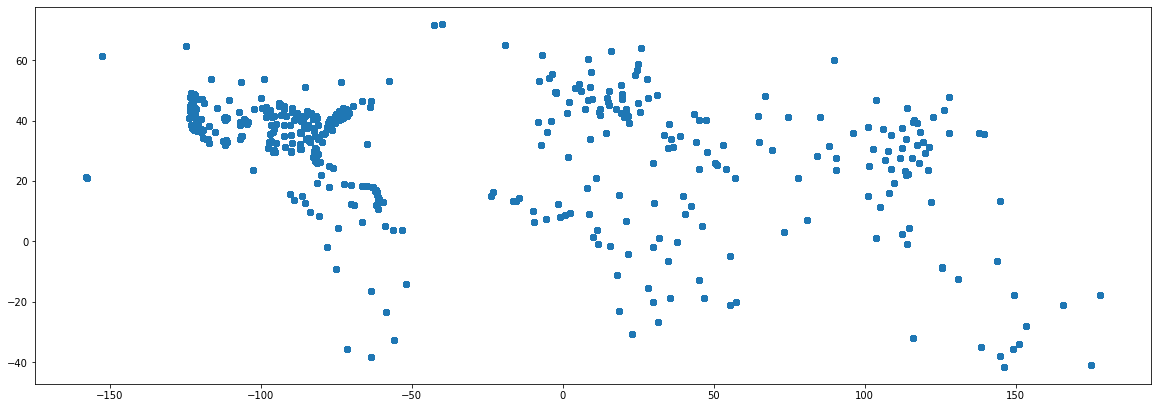

In [93]:
# Map plot
gdf01.plot(figsize=(20,10))

(-198.0, 198.00000000000006, -98.6822565, 92.32738650000002)

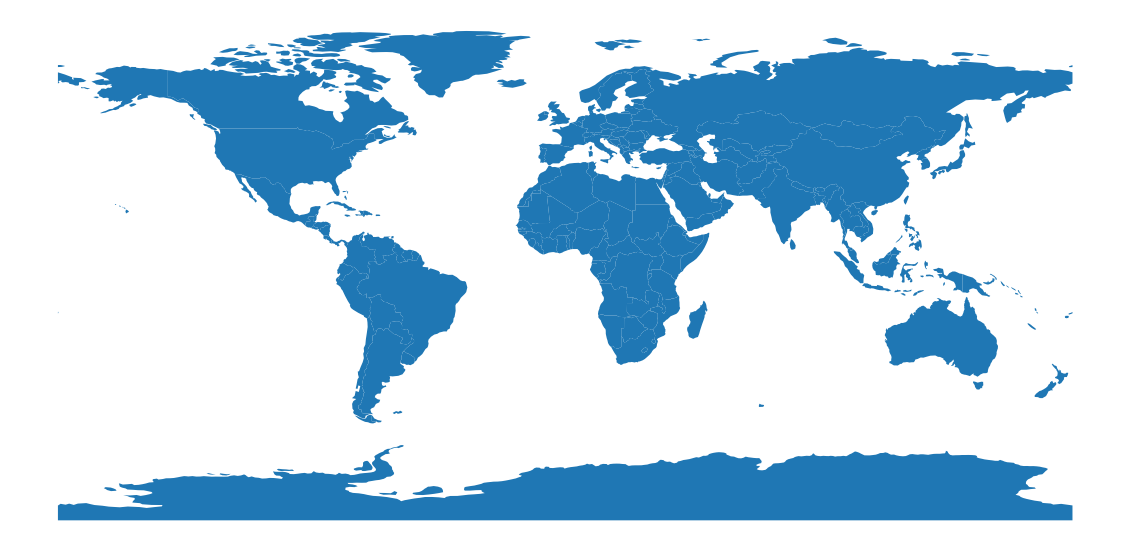

In [95]:
# Overlapping with world map
# First get the map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(20,10))
ax.axis('off')

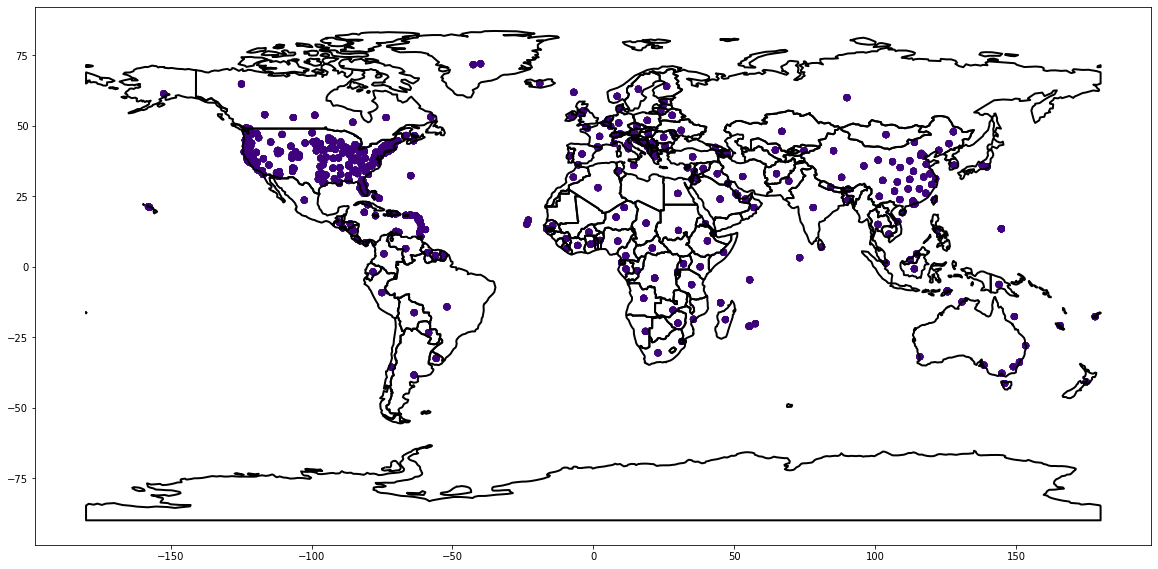

In [100]:
# Now overlap
fig,ax = plt.subplots(figsize=(20,10))
gdf01.plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

In [101]:
# Mapping per country
world['continent'].unique()

array(['Oceania', 'Africa', 'North America', 'Asia', 'South America',
       'Europe', 'Seven seas (open ocean)', 'Antarctica'], dtype=object)

In [103]:
# For Asia
asia = world[world['continent'] == 'Asia']
asia

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
5,18556698,Asia,Kazakhstan,KAZ,460700.00,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,29748859,Asia,Uzbekistan,UZB,202300.00,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
8,260580739,Asia,Indonesia,IDN,3028000.00,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
24,1291358,Asia,Timor-Leste,TLS,4975.00,"POLYGON ((124.96868 -8.89279, 125.08625 -8.656..."
76,8299706,Asia,Israel,ISR,297000.00,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6229794,Asia,Lebanon,LBN,85160.00,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4543126,Asia,Palestine,PSE,21220.77,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10248069,Asia,Jordan,JOR,86190.00,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,6072475,Asia,United Arab Emirates,ARE,667200.00,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2314307,Asia,Qatar,QAT,334500.00,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."


In [106]:
africa = world[world['continent'] == 'Africa']
north_america = world[world['continent'] == 'North America']
europe = world[world['continent'] == 'Europe']

In [110]:
# Cases in China
final_df[final_df['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
154,Hubei,China,30.9756,112.2707,1/22/20,444,28,17,POINT (112.27070 30.97560)
158,Guangdong,China,23.3417,113.4244,1/22/20,26,0,0,POINT (113.42440 23.34170)
159,Henan,China,33.8820,113.6140,1/22/20,5,0,0,POINT (113.61400 33.88200)
160,Zhejiang,China,29.1832,120.0934,1/22/20,10,0,0,POINT (120.09340 29.18320)
161,Hunan,China,27.6104,111.7088,1/22/20,4,0,0,POINT (111.70880 27.61040)
...,...,...,...,...,...,...,...,...,...
30749,Inner Mongolia,China,44.0935,113.9448,3/23/20,75,74,1,POINT (113.94480 44.09350)
30750,Ningxia,China,37.2692,106.1655,3/23/20,75,75,0,POINT (106.16550 37.26920)
30754,Qinghai,China,35.7452,95.9956,3/23/20,18,18,0,POINT (95.99560 35.74520)
30755,Macau,China,22.1667,113.5500,3/23/20,24,10,0,POINT (113.55000 22.16670)


In [111]:
gdf01[gdf01['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
154,Hubei,China,30.9756,112.2707,1/22/20,444,28,17,POINT (112.27070 30.97560)
158,Guangdong,China,23.3417,113.4244,1/22/20,26,0,0,POINT (113.42440 23.34170)
159,Henan,China,33.8820,113.6140,1/22/20,5,0,0,POINT (113.61400 33.88200)
160,Zhejiang,China,29.1832,120.0934,1/22/20,10,0,0,POINT (120.09340 29.18320)
161,Hunan,China,27.6104,111.7088,1/22/20,4,0,0,POINT (111.70880 27.61040)
...,...,...,...,...,...,...,...,...,...
30749,Inner Mongolia,China,44.0935,113.9448,3/23/20,75,74,1,POINT (113.94480 44.09350)
30750,Ningxia,China,37.2692,106.1655,3/23/20,75,75,0,POINT (106.16550 37.26920)
30754,Qinghai,China,35.7452,95.9956,3/23/20,18,18,0,POINT (95.99560 35.74520)
30755,Macau,China,22.1667,113.5500,3/23/20,24,10,0,POINT (113.55000 22.16670)


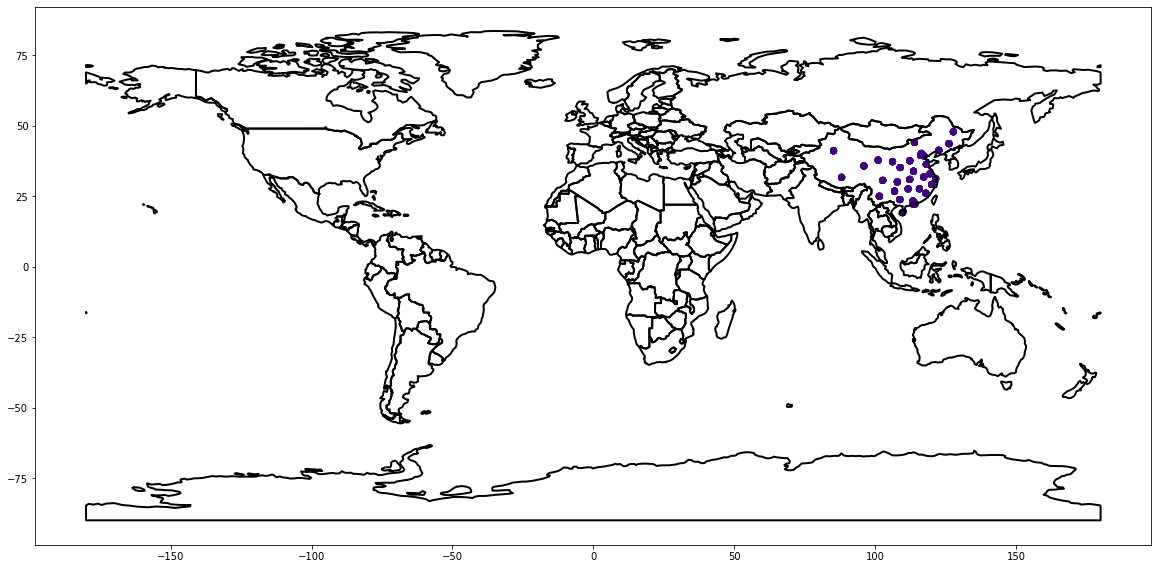

In [112]:
# Map showing cases in China
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country/Region'] == 'China'].plot(cmap='Purples',ax=ax)
world.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

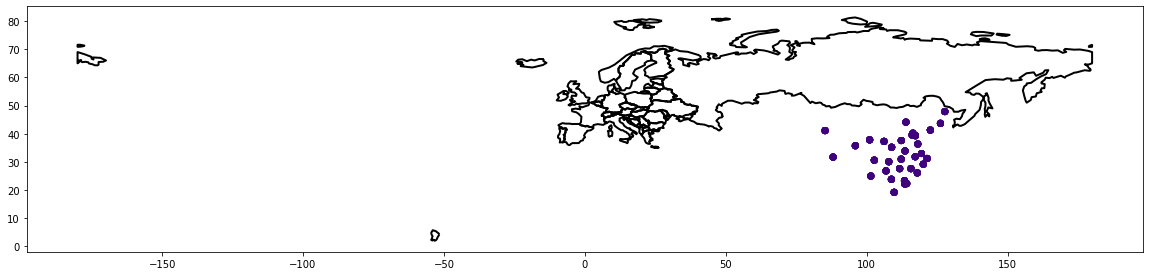

In [113]:
# To plot for an entire continent (Europe)
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country/Region'] == 'China'].plot(cmap='Purples',ax=ax)
europe.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

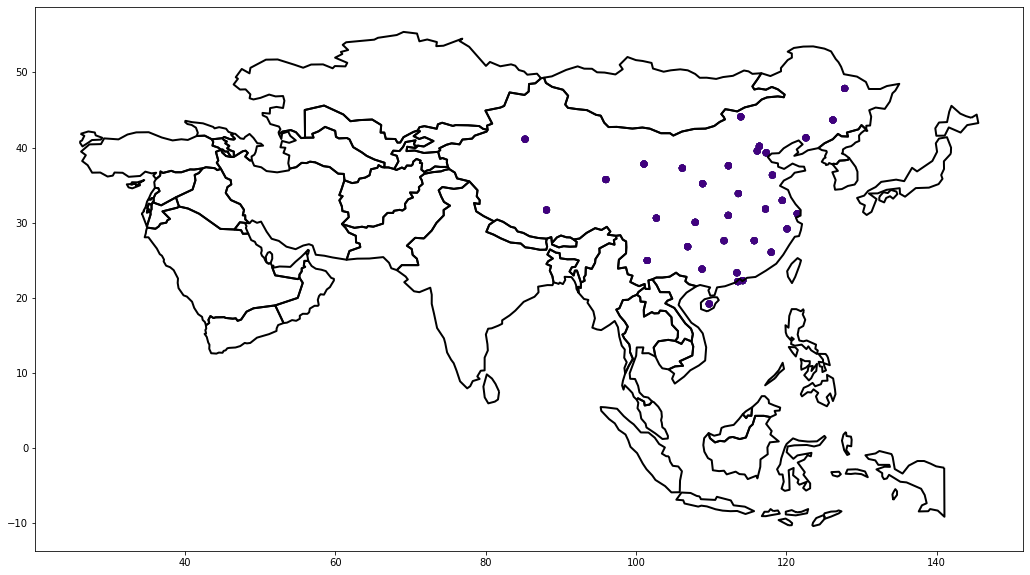

In [114]:
# To plot for an entire continent (Asia)
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country/Region'] == 'China'].plot(cmap='Purples',ax=ax)
asia.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

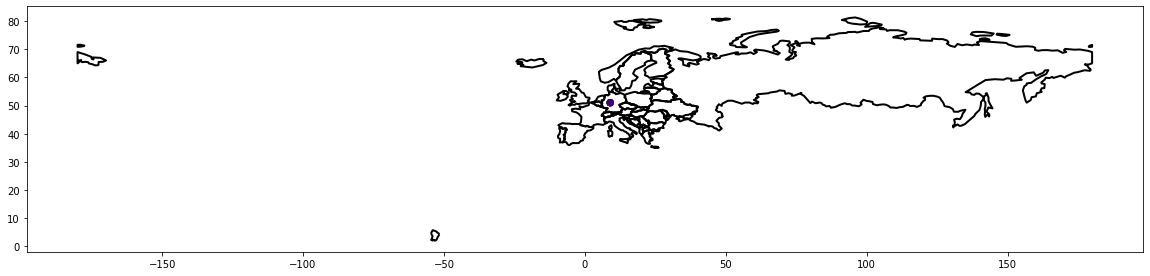

In [115]:
# To plot for Germany
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country/Region'] == 'Germany'].plot(cmap='Purples',ax=ax)
europe.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

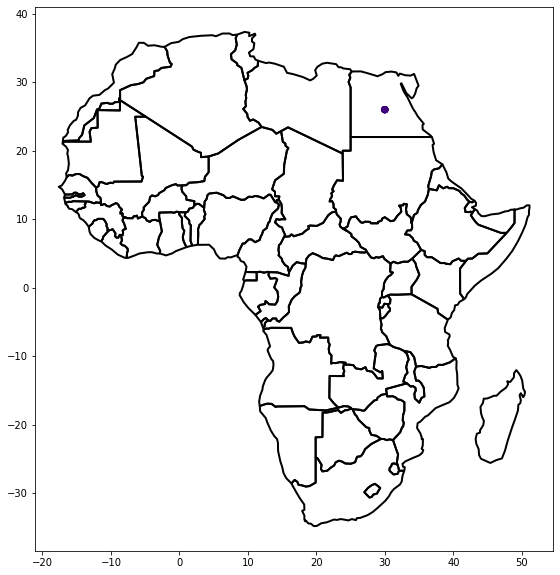

In [116]:
# To plot for Africa
fig,ax = plt.subplots(figsize=(20,10))
gdf01[gdf01['Country/Region'] == 'Egypt'].plot(cmap='Purples',ax=ax)
africa.geometry.boundary.plot(color=None,edgecolor='k',linewidth=2,ax=ax)

### Time series Analysis

In [118]:
# Copy original dataframe
final_df1 = final_df

In [119]:
final_df.to_csv('Covid_19_data_clean.csv')

In [123]:
final_df['Cases_date'] = pd.to_datetime(final_df1['Date'])
final_df1.dtypes

Province/State            object
Country/Region            object
Lat                      float64
Long                     float64
Date                      object
Confirmed                  int64
Recovered                  int64
Deaths                     int64
geometry                geometry
Cases_date        datetime64[ns]
dtype: object

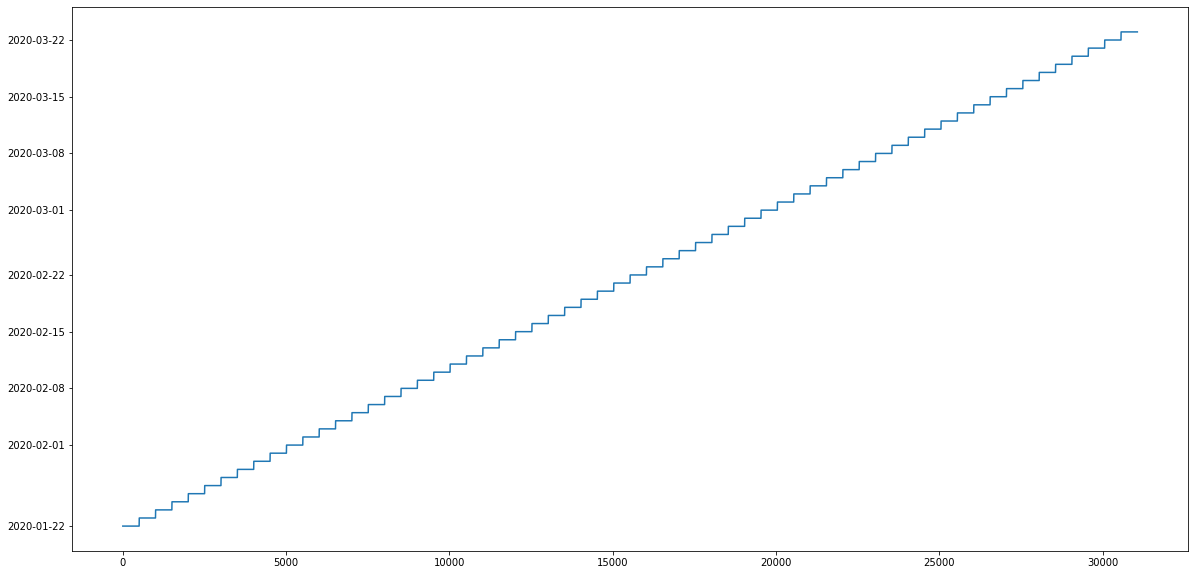

In [137]:
final_df['Cases_date'].plot(figsize=(20,10))

In [139]:
# Time Series
ts = final_df1.set_index('Cases_date')
ts

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
Cases_date,,,,,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
2020-01-22,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2020-01-22,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
2020-01-22,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
2020-01-22,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)
...,...,...,...,...,...,...,...,...,...
2020-03-23,NaN,Jersey,49.1900,-2.1100,3/23/20,0,0,0,POINT (-2.11000 49.19000)
2020-03-23,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0,0,1,POINT (-66.50000 18.20000)
2020-03-23,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0,0,0,POINT (15.55600 -1.44000)


In [140]:
# Select for only January
ts.loc['2020-01']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
Cases_date,,,,,,,,,
2020-01-22,NaN,Thailand,15.0000,101.0000,1/22/20,2,0,0,POINT (101.00000 15.00000)
2020-01-22,NaN,Japan,36.0000,138.0000,1/22/20,2,0,0,POINT (138.00000 36.00000)
2020-01-22,NaN,Singapore,1.2833,103.8333,1/22/20,0,0,0,POINT (103.83330 1.28330)
2020-01-22,NaN,Nepal,28.1667,84.2500,1/22/20,0,0,0,POINT (84.25000 28.16670)
2020-01-22,NaN,Malaysia,2.5000,112.5000,1/22/20,0,0,0,POINT (112.50000 2.50000)
...,...,...,...,...,...,...,...,...,...
2020-01-31,NaN,Jersey,49.1900,-2.1100,1/31/20,0,0,0,POINT (-2.11000 49.19000)
2020-01-31,NaN,Puerto Rico,18.2000,-66.5000,1/31/20,0,0,0,POINT (-66.50000 18.20000)
2020-01-31,NaN,Republic of the Congo,-1.4400,15.5560,1/31/20,0,0,0,POINT (15.55600 -1.44000)


In [141]:
# For two days in March
ts.loc['2020-03-20':'2020-03-21']

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Recovered,Deaths,geometry
Cases_date,,,,,,,,,
2020-03-20,NaN,Thailand,15.0000,101.0000,3/20/20,322,42,1,POINT (101.00000 15.00000)
2020-03-20,NaN,Japan,36.0000,138.0000,3/20/20,963,191,33,POINT (138.00000 36.00000)
2020-03-20,NaN,Singapore,1.2833,103.8333,3/20/20,385,124,0,POINT (103.83330 1.28330)
2020-03-20,NaN,Nepal,28.1667,84.2500,3/20/20,1,1,0,POINT (84.25000 28.16670)
2020-03-20,NaN,Malaysia,2.5000,112.5000,3/20/20,1030,87,3,POINT (112.50000 2.50000)
...,...,...,...,...,...,...,...,...,...
2020-03-21,NaN,Jersey,49.1900,-2.1100,3/21/20,0,0,0,POINT (-2.11000 49.19000)
2020-03-21,NaN,Puerto Rico,18.2000,-66.5000,3/21/20,0,0,0,POINT (-66.50000 18.20000)
2020-03-21,NaN,Republic of the Congo,-1.4400,15.5560,3/21/20,0,0,0,POINT (15.55600 -1.44000)
